# Exercice 1

## 1.A

Programmer structure de donnée permettant de représenter un multigraphe par sa matrice d'adjacence et programmer une fonction réalisant l'opération de contraction

In [92]:
#On commence par importer les packages utiles pour notre implémentation
import numpy as np
import random as rd
import time 
import matplotlib.pyplot as plt 

#Définissions notre structure de données à savoir la matrice d'adjacence
class matriceadj :
    #Nous allons initialiser la matrice 
    def __init__(self,taille):
        self.taille = taille
        self.adjMatrice = np.zeros((taille,taille))
        self.ens_sommets = [] #à cause de la contraction un sommet en représentera plusieurs 
        for i in range (taille):
            self.ens_sommets.append([i])
            #On programme une méthode permettant d'ajouter les arêtes
    def ajout_arete(self,u,v):
        self.adjMatrice[u,v] +=1
        self.adjMatrice[v,u] += 1
    
    #1.C
    #Tirage aléatoire 
    def tirage_arete(self):
        u = rd.randint(0,len(self.adjMatrice)-1)
        v = rd.randint(0,len(self.adjMatrice)-1)
        while(u==v or self.adjMatrice[u,v]==0): #Nous tirons aléatoirement une arête qui existe dans le graphe tout en évitant les boucles 
            u = rd.randint(0,len(self.adjMatrice)-1)
            v = rd.randint(0,len(self.adjMatrice)-1)
        return u,v
    
    #Passons à présent à la définition d'une fonction permettant de réaliser la contraction 
    #À noter que la contraction n'est rien d'autres que la suppression de l'arête choisie 
    def contraction(self,u,v):
        self.adjMatrice[v] += self.adjMatrice[u]
        self.adjMatrice[:,v] += self.adjMatrice[:,u]
        self.adjMatrice[v,v] = 0 #On supprime les boucles car elles n'ont aucun intérêt
        self.adjMatrice = np.delete(self.adjMatrice,u,0)
        self.adjMatrice = np.delete(self.adjMatrice,u,1)
        #Passons au merge des sommets 
        merge_sommets = self.ens_sommets[v]
        for s in merge_sommets :
            self.ens_sommets[u].append(s)
        self.ens_sommets.pop(v)
        return self.adjMatrice, self.ens_sommets
    
    def karger(self): 
        u,v = self.tirage_arete()
        #print("\nL'arête tirée est entre les sommets:",u,v)
        m,s = self.contraction(u,v)
        #print("Les sommets du graphe apres la contraction :",s)
        #print("La matrice d'adjacence apres la contraction :\n",m)
        while(len(m)>2):
            self.adjMatrice = m
            self.ens_sommets = s
            u,v = self.tirage_arete()
            #print("\nL'arête tirée est entre les sommets :",u,v)
            m,s = self.contraction(u,v)
            #print("La matrice d'adjacence apres la contraction :\n",m)
            #print("Les sommets du graphe apres la contraction :",s)
        return m,s
    
    

In [24]:
#Test
#g = matriceadj(4)
#g.ajout_arete(0, 1)
#g.ajout_arete(0, 2)
#g.ajout_arete(0, 3)
#g.ajout_arete(1, 3)
#g.ajout_arete(2, 3)
#print(g.adjMatrice)
#gbis,sommetsbis = g.contraction()
#print(gbis,sommetsbis)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]]
[[0. 2. 1.]
 [2. 0. 1.]
 [1. 1. 0.]] [[0], [2], [3, 1]]


## 1.B

Nous allons programmer différentes familles de graphes pour pouvoir tester les algorithmes par la suite 

In [75]:
#Cycle a n sommets 
def mat_cycle(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    matrix.ajout_arete(0,taille-1)
    for i in range(taille-1):
        matrix.ajout_arete(i,i+1)
    return matrix

#Graphe complet a n sommets 
def mat_complet(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    matrix = matriceadj(taille)#Pour initialiser ma matrice 
    #Comme tous les sommets du graphe sont reliés entre eux, toutes les cases de la matrice d'adjacence sont à 1, sauf la diagonale (pas de boucle)
    for i in range(taille):
        for j in range(taille):
            if j!= i and i <j:#pour ajouter qu'une seule arête entre chaque sommets et éviter les boucles
                matrix.ajout_arete(i,j)
    return matrix

#Graphe biparti complet n = 2k
def mat_bicomplet(taille):
    if (taille % 2 == 0):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice ) qui doit être pair
        matrix = matriceadj(taille)#Pour initialiser ma matrice
        for i in range(taille //2):
            for j in range(taille//2,taille):
                matrix.ajout_arete(i,j)
        return matrix
#Graphes aléatoires à n sommets où une arête est ajoutée à E avec une proba p
def mat_alea(size, p):
    mat = matriceadj(size)
    for i in range(size):
        for j in range(size):
            if(i<j):#pour ajouter qu'une seule arête entre chaque sommets
                _p = np.random.uniform(0,1)#tirage aléatoire de la proba
                if(_p < p):
                    mat.ajout_arete(i,j)
    return mat




Tester la fonction de contraction sur les familles de graphes


In [6]:
#Test de la fonction
c4 = mat_cycle(4)
print("Affichage d'un cycle de taille 4 \n",c4.adjMatrice)
c5 = mat_cycle(5)
print("Affichage d'un cycle de taille 5 \n",c5.adjMatrice)
print("Contraction de l'arête (0,1) pour le c4\n",c4.contraction(0,1))
print("Contraction de l'arête (0,1) pour le c5\n",c5.contraction(0,1))
print("----------------------------------------------------")
K4 = mat_complet(4)
print("Affichage d'un complet de taille 4 \n",K4.adjMatrice)
K5 = mat_complet(5)
print("Affichage d'un cycle de taille 5 \n",K5.adjMatrice)
print("Contraction de l'arête (0,1) pour le K4\n",K4.contraction(0,1))
print("Contraction de l'arête (0,1) pour le K5\n",K5.contraction(0,1))
print("----------------------------------------------------")
K22 = mat_bicomplet(4)
print("Affichage d'un biparti complet K2,2\n",K22.adjMatrice)
K33 = mat_bicomplet(6)
print("Affichage d'un biparti complet K3,3 \n",K33.adjMatrice)
print("Contraction de l'arête (0,2) pour le K22\n",K22.contraction(0,2))
print("Contraction de l'arête (0,3) pour le K33\n",K33.contraction(0,3))
print("----------------------------------------------------")
m = mat_alea(5,0.6)
print("Affichage d'une matrice aléatoire\n",m.adjMatrice)
print("contraction de l'arête (0,2)\n",m.contraction(0,2))

Affichage d'un cycle de taille 4 
 [[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
Affichage d'un cycle de taille 5 
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
Contraction de l'arête (0,1) pour le c4
 (array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]]), [[0, 1], [2], [3]])
Contraction de l'arête (0,1) pour le c5
 (array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]]), [[0, 1], [2], [3], [4]])
----------------------------------------------------
Affichage d'un complet de taille 4 
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
Affichage d'un cycle de taille 5 
 [[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]
Contraction de l'arête (0,1) pour le K4
 (array([[0., 2., 2.],
       [2., 0., 1.],
       [2., 1., 0.]]), [[0, 1], [2], [3]])
Contraction de l'arête (0,1) pour le K5
 (array([[0., 2., 2., 2.],
       [2.,

### Étude expérimentale de la complexité

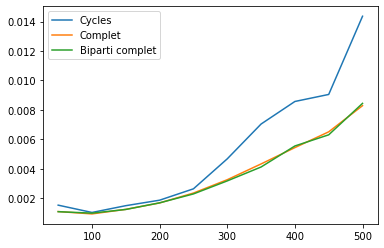

In [16]:
#On réalise notre étude expérimentale de la complexité sur différentes tailles n croissantes
tailles = [50,100,150,200,250,300,350,400,450,500]
temps1 = []
temps2 = []
temps3 = []

for i in tailles :
    t1 = 0
    t2 = 0
    t3 = 0
   
    for j in range(50): #On réitère plusieurs fois afin d'obtenir un temps moyen 
        m1 = mat_cycle(i)
        m2 = mat_complet(i)
        m3 = mat_bicomplet(i)
        #m4 = mat_alea(i,0.8) Nous discuterons de l'aléatoire lorsqu'on définira la fonction de tirage aléatoire
        debut = time.time()
        m1.contraction(0,1)
        end = time.time()
        t1 += end - debut
        
        debut = time.time()
        m2.contraction(0,1)
        end = time.time()
        t2 += end - debut
        
        start = time.time()
        m3.contraction(0,i//2)
        end = time.time()
        t3 += end - start
    
    temps1.append(np.mean(t1))
    temps2.append(np.mean(t2))
    temps3.append(np.mean(t3))
    
plt.plot(tailles,temps1, label='Cycles')
plt.plot(tailles,temps2, label='Complet')
plt.plot(tailles,temps3, label='Biparti complet')


plt.legend()
plt.savefig('Question 1.B.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.C

Implémentation de la fonction du tirage aléatoire (nous l'avons directement définie dans la class matriceadj

In [25]:
#def tirage_arête(Matrix):
 #   u = rd.randint(0,len(Matrix)-1)
  #  v = rd.randint(0,len(Matrix)-1)
   # while(u==v or Matrix[u,v]==0):
    #    u = rd.randint(0,len(Matrix)-1)
     #   v = rd.randint(0,len(Matrix)-1)
    #return u,v

## 1.D

Implémentation de l'algorithme de Karger (directement défini dans la classe matriceadj)

In [26]:
#def karger(Matrix,sommet): 
 # m=copy.deepcopy(Matrix)
  #u,v = tirage_arête(m)
  #print("\nL'arête tirée est entre les sommets:",u,v)
  #m,s = contraction(m,u,v,sommet)
  #print("Les sommets du graphe apres la contraction :",s)
  #print("La matrice d'adjacence apres la contraction :\n",m)
  #while(len(m)>2):
   # u,v = tirage_arête(m)
    #print("\nL'arête tirée est entre les sommets :",u,v)
    #m,s = contraction(m,u,v,s)
    #print("La matrice d'adjacence apres la contraction :\n",m)
    #print("Les sommets du graphe apres la contraction :",s)
  #return m,s

In [29]:
#Test de Karger 
#g = matriceadj(4)
#g.ajout_arete(0, 1)
#g.ajout_arete(0, 2)
#g.ajout_arete(0, 3)
#g.ajout_arete(1, 3)
#g.ajout_arete(2, 3)
#print(g.adjMatrice)

#g.karger()


[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 1. 0.]]

L'arête tirée est entre les sommets: 1 3
Les sommets du graphe apres la contraction : [[0], [1, 3], [2]]
La matrice d'adjacence apres la contraction :
 [[0. 1. 2.]
 [1. 0. 1.]
 [2. 1. 0.]]

L'arête tirée est entre les sommets : 2 1
La matrice d'adjacence apres la contraction :
 [[0. 3.]
 [3. 0.]]
Les sommets du graphe apres la contraction : [[0], [2, 1, 3]]


(array([[0., 3.],
        [3., 0.]]),
 [[0], [2, 1, 3]])

### Expérimentation de Karger sur les familles de graphes

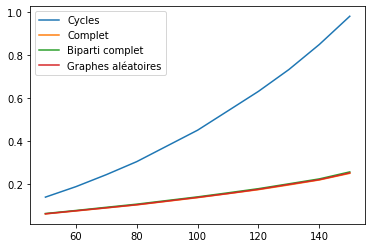

In [39]:
#On réalise notre étude expérimentale de la complexité sur différentes tailles n croissantes
tailles = [50,60,70,80,100,110,120,130,140,150]
temps1 = []
temps2 = []
temps3 = []
temps4 = []

for i in tailles :
    t1 = 0
    t2 = 0
    t3 = 0
    t4 = 0
   
    for j in range(50): #On réitère plusieurs fois afin d'obtenir un temps moyen 
        m1 = mat_cycle(i)
        m2 = mat_complet(i)
        m3 = mat_bicomplet(i)
        m4 = mat_alea(i,0.8)
        
        debut = time.time()
        m1.karger()
        end = time.time()
        t1 += end - debut
        
        debut = time.time()
        m2.karger()
        end = time.time()
        t2 += end - debut
        
        start = time.time()
        m3.karger()
        end = time.time()
        t3 += end - start
        
        debut = time.time()
        m4.karger()
        end = time.time()
        t4 += end - debut
    
    temps1.append(np.mean(t1))
    temps2.append(np.mean(t2))
    temps3.append(np.mean(t3))
    temps4.append(np.mean(t4))
    
plt.plot(tailles,temps1, label='Cycles')
plt.plot(tailles,temps2, label='Complet')
plt.plot(tailles,temps3, label='Biparti complet')
plt.plot(tailles,temps4, label='Graphes aléatoires')



plt.legend()
plt.savefig('Question 1.D.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.E

Implémentation d'une nouvelle structure de données afin de représenter un graphe par sa liste d'adjacence

Programmer la structure de données pour représenter les multigraphes et une fonction réalisant l'opération de contraction Cette fois-ci sur une liste d'adjacence

In [49]:
#Structure de donnée permettant de représenter un graphe par sa liste  d'adjacence
class listadj:
    def __init__(self,Nodes,is_directed=False):
        self.nodes=Nodes
        self.adj_list={}
        self.is_directed=is_directed

        for node in self.nodes:
            self.adj_list[node]=[]

    def add_edge(self,v,e):
        self.adj_list[v].append(e)
        if not self.is_directed:
            self.adj_list[e].append(v)
    
#Fonction qui va tout simplement remplacer le sommet contracté par u puis le supprimer
def changer_sommet(adjlist,node,v,u):
    adjlist[node]= [u if n == v else n for n in adjlist[node] if n != node]
#Fonction qui réalise la contraction
def contractlist(adjlist,u,v):
    arete_de_v = [n for n in adjlist[v] if n!= u]
    adjlist[u] = [n for n in adjlist[u] if n!= v]
    adjlist[u] += arete_de_v
    adjlist.pop(v)
    for node in list(set(arete_de_v)):
        changer_sommet(adjlist, node, v, u)
    return adjlist



In [51]:
#Test
#edges=[(0,1),(0,2),(0,3),(1,3),(2,3)]
#nodes=[0,1,2,3]
#graph=listadj(nodes,is_directed=False)
#for v,e in edges:
 #   graph.add_edge(v,e)
#graph.print_adj() #C'est un dictionnaire en gros
#m = graph.adj_list
#contractlist(m,0,1)

{0: [2, 3, 3], 2: [0, 3], 3: [0, 0, 2]}

## 1.F

Fonction permettant de réaliser le tirage aléatoire

In [52]:
import random 
def tiragelist(adjlist):
    u = random.choice(list(adjlist)) #On choisit notre premier sommet à partir des clés de notre dictionnaires
    v = random.choice(adjlist[u])#On choisit aléatoirement l'un de ses voisins en parcourant les valeurs de la clé correspondante
    return u,v 

## 1.G

Faire l'algorithme de Karger avec liste d'adjacence 

In [67]:
def kargerlist(adjlist):
    while len(adjlist) > 2:
        u,v = tiragelist(adjlist)
        #print("L'arête tirée est :",u,v)
        adjlist = contractlist(adjlist,u,v)
        #print(adjlist)
    return adjlist

In [56]:
#test 
#edges=[(0,1),(0,2),(0,3),(1,3),(2,3)]
#nodes=[0,1,2,3]
#graph=listadj(nodes,is_directed=False)
#for v,e in edges:
 #   graph.add_edge(v,e)
#graph.print_adj() #C'est un dictionnaire en gros
#m = graph.adj_list
#kargerlist(m)

L'arête tirée est : 3 2
{0: [1, 3, 3], 1: [0, 3], 3: [0, 1, 0]}
L'arête tirée est : 0 1
{0: [3, 3, 3], 3: [0, 0, 0]}


{0: [3, 3, 3], 3: [0, 0, 0]}

## 1.H

Nous allons tout d'abord adapter la définition des graphes par leur liste d'adjacence

In [72]:
#Cycle a n sommets 
def matl_cycle(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    noeud = [i for i in range(taille)]
    matrix = listadj(noeud,is_directed = False)#Pour initialiser ma matrice 
    matrix.add_edge(0,taille-1)
    for i in range(taille-1):
        matrix.add_edge(i,i+1)
    return matrix

#Graphe complet a n sommets 
def matl_complet(taille):#La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice )
    noeud = [i for i in range(taille)]
    matrix = listadj(noeud)#Pour initialiser ma matrice 
  #Comme tous les sommets du graphe sont reliés entre eux, toutes les cases de la matrice d'adjacence sont à 1, sauf la diagonale (pas de boucle)
    for i in range(taille):
        for j in range(taille):
            if j!= i and i <j:
                matrix.add_edge(i,j)

    return matrix

#Graphe biparti complet
def matl_bicomplet(taille):
    if (taille % 2 == 0):
        #La fonction prend en argument le nombre de sommets du graphe (aka taille de la matrice ) qui doit être pair
        noeud = [i for i in range(taille)]
        matrix = listadj(noeud)#Pour initialiser ma matrice 
        for i in range(taille //2):
            for j in range(taille//2,taille):
                matrix.add_edge(i,j)
    return matrix
#Graphes aléatoires
def matl_alea(taille, p):
    noeud = [i for i in range(taille)]
    mat = listadj(noeud)
    for i in range(taille):
        for j in range(taille):
            if(i<j):#pour ajouter qu'une seule arête entre chaque sommets
                _p = np.random.uniform(0,1)
                if(_p < p):
                    mat.add_edge(i,j)
                  
    return mat

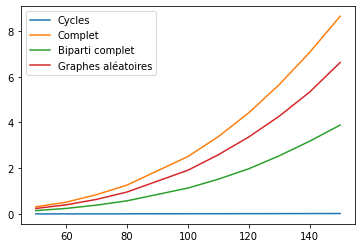

In [68]:
#On réalise notre étude expérimentale de la complexité sur différentes tailles n croissantes
tailles = [50,60,70,80,100,110,120,130,140,150]
temps1 = []
temps2 = []
temps3 = []
temps4 = []

for i in tailles :
    t1 = 0
    t2 = 0
    t3 = 0
    t4 = 0
   
    for j in range(50): #On réitère plusieurs fois afin d'obtenir un temps moyen 
        m1 = matl_cycle(i).adj_list
        m2 = matl_complet(i).adj_list
        m3 = matl_bicomplet(i).adj_list
        m4 = matl_alea(i,0.8).adj_list
        
        debut = time.time()
        kargerlist(m1)
        end = time.time()
        t1 += end - debut
        
        debut = time.time()
        kargerlist(m2)
        end = time.time()
        t2 += end - debut
        
        start = time.time()
        kargerlist(m3)
        end = time.time()
        t3 += end - start
        
        debut = time.time()
        kargerlist(m4)
        end = time.time()
        t4 += end - debut
    
    temps1.append(np.mean(t1))
    temps2.append(np.mean(t2))
    temps3.append(np.mean(t3))
    temps4.append(np.mean(t4))
    
plt.plot(tailles,temps1, label='Cycles')
plt.plot(tailles,temps2, label='Complet')
plt.plot(tailles,temps3, label='Biparti complet')
plt.plot(tailles,temps4, label='Graphes aléatoires')



plt.legend()
plt.savefig('Question 1.H.png', dpi=300, bbox_inches='tight')
plt.show()